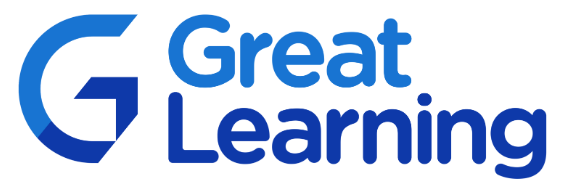

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Course 2: Week05 - Linear Regression - Practice Exercise

-------------

##  <font color='blue'> Table Of Contents </font>
- ### <font color='blue'> Problem Statement </font>   
- ### <font color='blue'> Importing necessary libraries and reading the dataset </font>
- ### <font color='blue'> Exploratory Data Analysis</font>
- ### <font color='blue'> Data Preparation for Model Building</font>
- ### <font color='blue'> Model Building and Evaluation</font>

### <font color = 'green'> **Problem-Statement**



<p>Airbnb Inc is an online marketplace for arranging or offering lodging, primarily homestays, or tourism experiences. Airbnb has close to 150 million customers across the world. Price is the most important factor considered by the customer while making booking into a property. Strategic pricing of the properties is important to avoid losing customers to the competitors.</p>
<p>We have a data of 74111 Airbnb properties across the nations. Based on this data build multiple linear regression model to predict the strategic pricing of a new listed property on Airbnb.</p>


#### <font color = 'green'> **Attribute Information.**

- **id** - Property ID
- **room_type** - Type of Room in the property.
- **accommodates** - How many adults can this property accomodates.
- **bathrooms** - Number of bathrooms in the property.
- **cancellation_policy** - Cancellation policy of the property.
- **cleaning_fee** - This denotes whether propoerty cleaning fee is included in the rent or not.
- **instant_bookable** - It indicates whether instant booking facility is available or not.
- **review_scores_rating** - Review rating score of the property.
- **bedrooms** - Number of bedrooms in the property.
- **beds** - Total number of beds in the property.
- **log_price** - Log of rental price of the property for a fixed period.


### <font color = 'green'> **Import necessary libraries and read the dataset.**

In [8]:
import pandas as pd
import numpy as np

# Libraries used for visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px  # pip install plotly

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [9]:
df=pd.read_csv('AirBNB-1.csv')
df

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,Private room,1.0,1.0,flexible,False,f,NaN,1.0,1.0,4.605170
74107,13281809,Entire home/apt,4.0,2.0,moderate,True,f,93.0,2.0,4.0,5.043425
74108,18688039,Entire home/apt,5.0,1.0,moderate,True,t,94.0,2.0,2.0,5.220356
74109,17045948,Entire home/apt,2.0,1.0,strict,True,t,NaN,0.0,2.0,5.273000



### <font color = 'green'> **Exploratory Data Analysis**


<font size=3> Perform Necessary Exploratory Data Analysis.

In [10]:
df.shape

(74111, 11)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   room_type             74106 non-null  object 
 2   accommodates          74108 non-null  float64
 3   bathrooms             73908 non-null  float64
 4   cancellation_policy   74103 non-null  object 
 5   cleaning_fee          74107 non-null  object 
 6   instant_bookable      74111 non-null  object 
 7   review_scores_rating  57389 non-null  float64
 8   bedrooms              74019 non-null  float64
 9   beds                  73980 non-null  float64
 10  log_price             74111 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 6.2+ MB


In [12]:
df.describe()

,id,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price
count,7.411100e+04,74108.000000,73908.000000,57389.000000,74019.000000,73980.000000,74111.000000
mean,1.126662e+07,3.155125,1.235272,94.067365,1.265797,1.710868,4.782069
std,6.081735e+06,2.153603,0.582054,7.836556,0.852149,1.254142,0.717394
min,3.440000e+02,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000
25%,6.261964e+06,2.000000,1.000000,92.000000,1.000000,1.000000,4.317488
50%,1.225415e+07,2.000000,1.000000,96.000000,1.000000,1.000000,4.709530
75%,1.640226e+07,4.000000,1.000000,100.000000,1.000000,2.000000,5.220356
max,2.123090e+07,16.000000,8.000000,100.000000,10.000000,18.000000,7.600402


In [13]:
df.isnull().sum()

id                          0
room_type                   5
accommodates                3
bathrooms                 203
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    16722
bedrooms                   92
beds                      131
log_price                   0
dtype: int64

### <font color = 'green'> **Data Preparation for model buidling.**

<font size=3> Q. Encode Categorical Variables.

In [14]:
df1 = pd.get_dummies(df, columns=['room_type','cancellation_policy','cleaning_fee','instant_bookable'])
df1


,id,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_False,cleaning_fee_True,instant_bookable_f,instant_bookable_t
0,6901257,3.0,1.0,100.0,1.0,1.0,5.010635,1,0,0,0,0,1,0,1,1,0
1,6304928,7.0,1.0,93.0,3.0,3.0,5.129899,1,0,0,0,0,1,0,1,0,1
2,7919400,5.0,1.0,92.0,1.0,3.0,4.976734,1,0,0,0,1,0,0,1,0,1
3,13418779,4.0,1.0,NaN,2.0,2.0,6.620073,1,0,0,1,0,0,0,1,1,0
4,3808709,2.0,1.0,40.0,0.0,1.0,4.744932,1,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,1.0,1.0,NaN,1.0,1.0,4.605170,0,1,0,1,0,0,1,0,1,0
74107,13281809,4.0,2.0,93.0,2.0,4.0,5.043425,1,0,0,0,1,0,0,1,1,0
74108,18688039,5.0,1.0,94.0,2.0,2.0,5.220356,1,0,0,0,1,0,0,1,0,1
74109,17045948,2.0,1.0,NaN,0.0,2.0,5.273000,1,0,0,0,0,1,0,1,0,1


<font size=3> Q. Check for missing values and handle them with appropriate methods.

In [15]:
df1.isna().sum()

id                                  0
accommodates                        3
bathrooms                         203
review_scores_rating            16722
bedrooms                           92
beds                              131
log_price                           0
room_type_Entire home/apt           0
room_type_Private room              0
room_type_Shared room               0
cancellation_policy_flexible        0
cancellation_policy_moderate        0
cancellation_policy_strict          0
cleaning_fee_False                  0
cleaning_fee_True                   0
instant_bookable_f                  0
instant_bookable_t                  0
dtype: int64

In [16]:
def accommodates_num(s):
    if not s or isinstance(s,float):
        return s
    return (s.replace('.',''))
df1['accommodates']=df1['accommodates'].apply(accommodates_num)
df1['accommodates']=df1['accommodates'].astype(float)
df1.head()

,id,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_False,cleaning_fee_True,instant_bookable_f,instant_bookable_t
0,6901257,3.0,1.0,100.0,1.0,1.0,5.010635,1,0,0,0,0,1,0,1,1,0
1,6304928,7.0,1.0,93.0,3.0,3.0,5.129899,1,0,0,0,0,1,0,1,0,1
2,7919400,5.0,1.0,92.0,1.0,3.0,4.976734,1,0,0,0,1,0,0,1,0,1
3,13418779,4.0,1.0,NaN,2.0,2.0,6.620073,1,0,0,1,0,0,0,1,1,0
4,3808709,2.0,1.0,40.0,0.0,1.0,4.744932,1,0,0,0,1,0,0,1,0,1


In [17]:
df1['accommodates'].unique()

array([ 3.,  7.,  5.,  4.,  2.,  6.,  8.,  1.,  9., 10., 16., nan, 11.,
       12., 14., 13., 15.])

In [18]:

columns_to_fill=['accommodates','bathrooms','review_scores_rating','bedrooms','beds']
for column in columns_to_fill:
    column_mean = df1[column].mode()
    df1[column].fillna(column_mean, inplace=True)
df1

,id,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_False,cleaning_fee_True,instant_bookable_f,instant_bookable_t
0,6901257,3.0,1.0,100.0,1.0,1.0,5.010635,1,0,0,0,0,1,0,1,1,0
1,6304928,7.0,1.0,93.0,3.0,3.0,5.129899,1,0,0,0,0,1,0,1,0,1
2,7919400,5.0,1.0,92.0,1.0,3.0,4.976734,1,0,0,0,1,0,0,1,0,1
3,13418779,4.0,1.0,NaN,2.0,2.0,6.620073,1,0,0,1,0,0,0,1,1,0
4,3808709,2.0,1.0,40.0,0.0,1.0,4.744932,1,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,1.0,1.0,NaN,1.0,1.0,4.605170,0,1,0,1,0,0,1,0,1,0
74107,13281809,4.0,2.0,93.0,2.0,4.0,5.043425,1,0,0,0,1,0,0,1,1,0
74108,18688039,5.0,1.0,94.0,2.0,2.0,5.220356,1,0,0,0,1,0,0,1,0,1
74109,17045948,2.0,1.0,NaN,0.0,2.0,5.273000,1,0,0,0,0,1,0,1,0,1


 Q. Check for duplicate records and drop them.

In [19]:
df1.duplicated().sum()

0

In [20]:
df1['price']=np.exp(df1['log_price'])
df1

,id,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_False,cleaning_fee_True,instant_bookable_f,instant_bookable_t,price
0,6901257,3.0,1.0,100.0,1.0,1.0,5.010635,1,0,0,0,0,1,0,1,1,0,150.0
1,6304928,7.0,1.0,93.0,3.0,3.0,5.129899,1,0,0,0,0,1,0,1,0,1,169.0
2,7919400,5.0,1.0,92.0,1.0,3.0,4.976734,1,0,0,0,1,0,0,1,0,1,145.0
3,13418779,4.0,1.0,NaN,2.0,2.0,6.620073,1,0,0,1,0,0,0,1,1,0,750.0
4,3808709,2.0,1.0,40.0,0.0,1.0,4.744932,1,0,0,0,1,0,0,1,0,1,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,1.0,1.0,NaN,1.0,1.0,4.605170,0,1,0,1,0,0,1,0,1,0,100.0
74107,13281809,4.0,2.0,93.0,2.0,4.0,5.043425,1,0,0,0,1,0,0,1,1,0,155.0
74108,18688039,5.0,1.0,94.0,2.0,2.0,5.220356,1,0,0,0,1,0,0,1,0,1,185.0
74109,17045948,2.0,1.0,NaN,0.0,2.0,5.273000,1,0,0,0,0,1,0,1,0,1,195.0


<font size=3> Q. Check for the presence of outliers and treat them with appropriate techniques.

<Axes: >

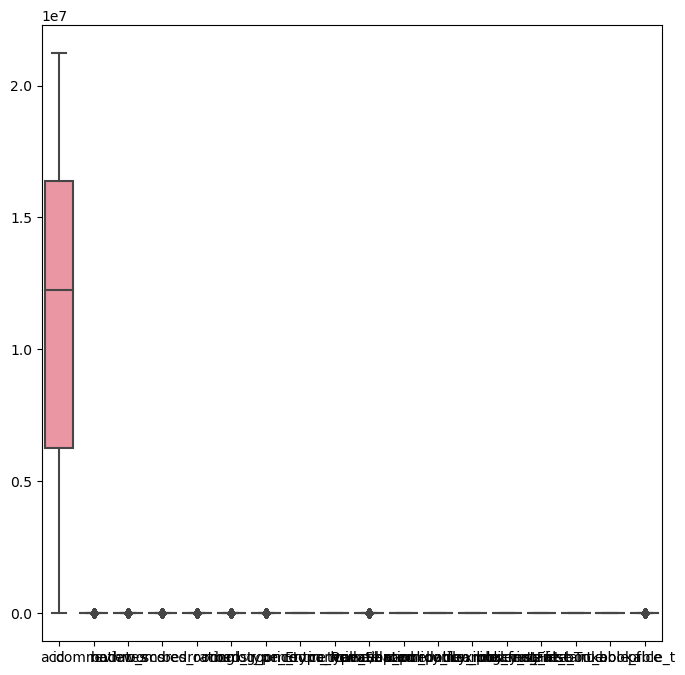

In [21]:
plt.figure(figsize=(8,8))
sns.boxplot(df1)

In [24]:
df1.isnull().sum()

id                                  0
accommodates                        3
bathrooms                         203
review_scores_rating            16722
bedrooms                           92
beds                              131
log_price                           0
room_type_Entire home/apt           0
room_type_Private room              0
room_type_Shared room               0
cancellation_policy_flexible        0
cancellation_policy_moderate        0
cancellation_policy_strict          0
cleaning_fee_False                  0
cleaning_fee_True                   0
instant_bookable_f                  0
instant_bookable_t                  0
price                               0
dtype: int64

In [27]:
mean_a = df1['accommodates'].mean()
mean_b = df1['bathrooms'].mean()
mean_re = df1['review_scores_rating'].mean()
mean_bedr = df1['bedrooms'].mean()
mean_bed = df1['beds'].mean()
# Fill NaN values with the respective column means
df1['accommodates'].fillna(mean_a, inplace=True)
df1['bathrooms'].fillna(mean_b, inplace=True)
df1['review_scores_rating'].fillna(mean_re, inplace=True)
df1['bedrooms'].fillna(mean_bedr, inplace=True)
df1['beds'].fillna(mean_bed,inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            74111 non-null  int64  
 1   accommodates                  74111 non-null  float64
 2   bathrooms                     74111 non-null  float64
 3   review_scores_rating          74111 non-null  float64
 4   bedrooms                      74111 non-null  float64
 5   beds                          74111 non-null  float64
 6   log_price                     74111 non-null  float64
 7   room_type_Entire home/apt     74111 non-null  uint8  
 8   room_type_Private room        74111 non-null  uint8  
 9   room_type_Shared room         74111 non-null  uint8  
 10  cancellation_policy_flexible  74111 non-null  uint8  
 11  cancellation_policy_moderate  74111 non-null  uint8  
 12  cancellation_policy_strict    74111 non-null  uint8  
 13  c

In [31]:
x=df1.iloc[:,0:-1]
y=df1.iloc[:,-1]
x.head()



,id,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_False,cleaning_fee_True,instant_bookable_f,instant_bookable_t
0,6901257,3.0,1.0,100.000000,1.0,1.0,5.010635,1,0,0,0,0,1,0,1,1,0
1,6304928,7.0,1.0,93.000000,3.0,3.0,5.129899,1,0,0,0,0,1,0,1,0,1
2,7919400,5.0,1.0,92.000000,1.0,3.0,4.976734,1,0,0,0,1,0,0,1,0,1
3,13418779,4.0,1.0,94.067365,2.0,2.0,6.620073,1,0,0,1,0,0,0,1,1,0
4,3808709,2.0,1.0,40.000000,0.0,1.0,4.744932,1,0,0,0,1,0,0,1,0,1


In [29]:
x=df1.iloc[:,0:-1]
y=df1.iloc[:,-1]
x.head()


,id,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_False,cleaning_fee_True,instant_bookable_f,instant_bookable_t
0,6901257,3.0,1.0,100.000000,1.0,1.0,5.010635,1,0,0,0,0,1,0,1,1,0
1,6304928,7.0,1.0,93.000000,3.0,3.0,5.129899,1,0,0,0,0,1,0,1,0,1
2,7919400,5.0,1.0,92.000000,1.0,3.0,4.976734,1,0,0,0,1,0,0,1,0,1
3,13418779,4.0,1.0,94.067365,2.0,2.0,6.620073,1,0,0,1,0,0,0,1,1,0
4,3808709,2.0,1.0,40.000000,0.0,1.0,4.744932,1,0,0,0,1,0,0,1,0,1


<Axes: >

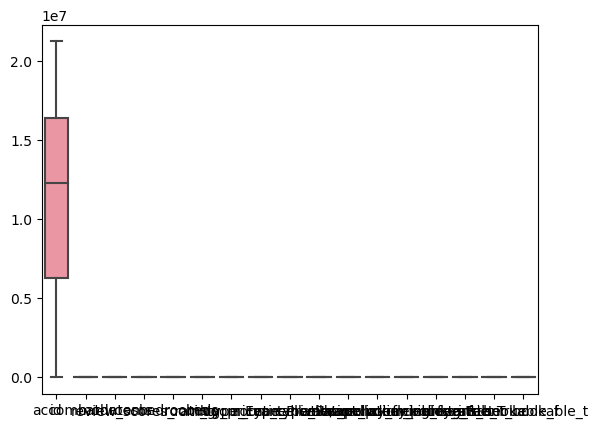

In [30]:
def remove_outliers(d):
    """
    This function removes the outliers according to the box plot.
    input: d is numerical column
    return: the same column as input by replacing outliers with upper and lower limits
    """
    Q1, Q3 = np.quantile(d,q=[0.25,0.75])
    IQR = Q3-Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    # lower,upper
    d1 = np.where(d<lower,lower,d)
    d1 = np.where(d1>upper,upper,d1)
    return d1

col_names = x.columns
for c in col_names:
    x[c] = remove_outliers(x[c])

sns.boxplot(data=x)

<font size=3> Q. Split the dataset into two parts (i.e. 70% train and 30% test).

In [32]:
# Copy all the predictor variables into X dataframe. Since 'price' is dependent variable drop it
X = df1.drop('price', axis=1)
X = X.drop({'room_type_Entire home/apt','room_type_Private room','room_type_Shared room'}, axis=1)

# Copy the 'price' column alone into the y dataframe. This is the dependent variable
y = df1[['price']]

# Let us break the X and y dataframes into training set and test set. For this we will use
# Sklearn package's data splitting function which is based on random function
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)


In [33]:
df1.isnull().sum()

id                              0
accommodates                    0
bathrooms                       0
review_scores_rating            0
bedrooms                        0
beds                            0
log_price                       0
room_type_Entire home/apt       0
room_type_Private room          0
room_type_Shared room           0
cancellation_policy_flexible    0
cancellation_policy_moderate    0
cancellation_policy_strict      0
cleaning_fee_False              0
cleaning_fee_True               0
instant_bookable_f              0
instant_bookable_t              0
price                           0
dtype: int64

<font size=3> Q. Scale the data using appropriate approach.

In [86]:
#from sklearn.preprocessing import StandardScaler


In [87]:
#scaler=StandardScaler()
#scaled_data=scaler.fit_transform(df1)
#df1=pd.DataFrame(df1.columns)
#df1

,0
0,id
1,accommodates
2,bathrooms
3,review_scores_rating
4,bedrooms
5,beds
6,log_price
7,room_type_Entire home/apt
8,room_type_Private room
9,room_type_Shared room


In [37]:
df1.corr()

,id,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_False,cleaning_fee_True,instant_bookable_f,instant_bookable_t,price
id,1.000000,-0.005740,-0.003934,0.000270,-0.007518,-0.008657,-0.007178,-0.003945,0.001610,0.007250,0.002545,0.000222,-0.002507,0.003059,-0.002995,-0.002497,0.002497,-0.002698
accommodates,-0.005740,1.000000,0.505124,-0.014975,0.709108,0.809980,0.567579,0.481226,-0.454771,-0.089466,-0.171479,-0.041467,0.195573,-0.182286,0.182340,-0.053100,0.053100,0.519334
bathrooms,-0.003934,0.505124,1.000000,0.008924,0.589618,0.525293,0.355023,0.139811,-0.151675,0.031126,-0.054550,-0.053549,0.097799,-0.053676,0.053722,-0.001450,0.001450,0.458988
review_scores_rating,0.000270,-0.014975,0.008924,1.000000,0.009672,-0.024215,0.074822,0.030652,-0.018371,-0.036828,-0.008142,0.056372,-0.042109,-0.028085,0.028027,0.061013,-0.061013,0.047114
bedrooms,-0.007518,0.709108,0.589618,0.009672,1.000000,0.709100,0.473048,0.253325,-0.237007,-0.054116,-0.093622,-0.048598,0.129741,-0.105368,0.105399,0.003645,-0.003645,0.494373
beds,-0.008657,0.809980,0.525293,-0.024215,0.709100,1.000000,0.441767,0.355293,-0.359805,0.004244,-0.139366,-0.049449,0.172829,-0.131430,0.131491,-0.051310,0.051310,0.432944
log_price,-0.007178,0.567579,0.355023,0.074822,0.473048,0.441767,1.000000,0.602480,-0.531626,-0.222487,-0.095842,-0.050100,0.132947,-0.111191,0.111130,0.044271,-0.044271,0.840001
room_type_Entire home/apt,-0.003945,0.481226,0.139811,0.030652,0.253325,0.355293,0.602480,1.000000,-0.941986,-0.194571,-0.164335,-0.003584,0.155436,-0.209904,0.209843,0.023809,-0.023809,0.388599
room_type_Private room,0.001610,-0.454771,-0.151675,-0.018371,-0.237007,-0.359805,-0.531626,-0.941986,1.000000,-0.145547,0.147975,0.013932,-0.149395,0.183224,-0.183171,-0.016853,0.016853,-0.357954
room_type_Shared room,0.007250,-0.089466,0.031126,-0.036828,-0.054116,0.004244,-0.222487,-0.194571,-0.145547,1.000000,0.052109,-0.030313,-0.021574,0.083423,-0.083396,-0.021008,0.021008,-0.099447


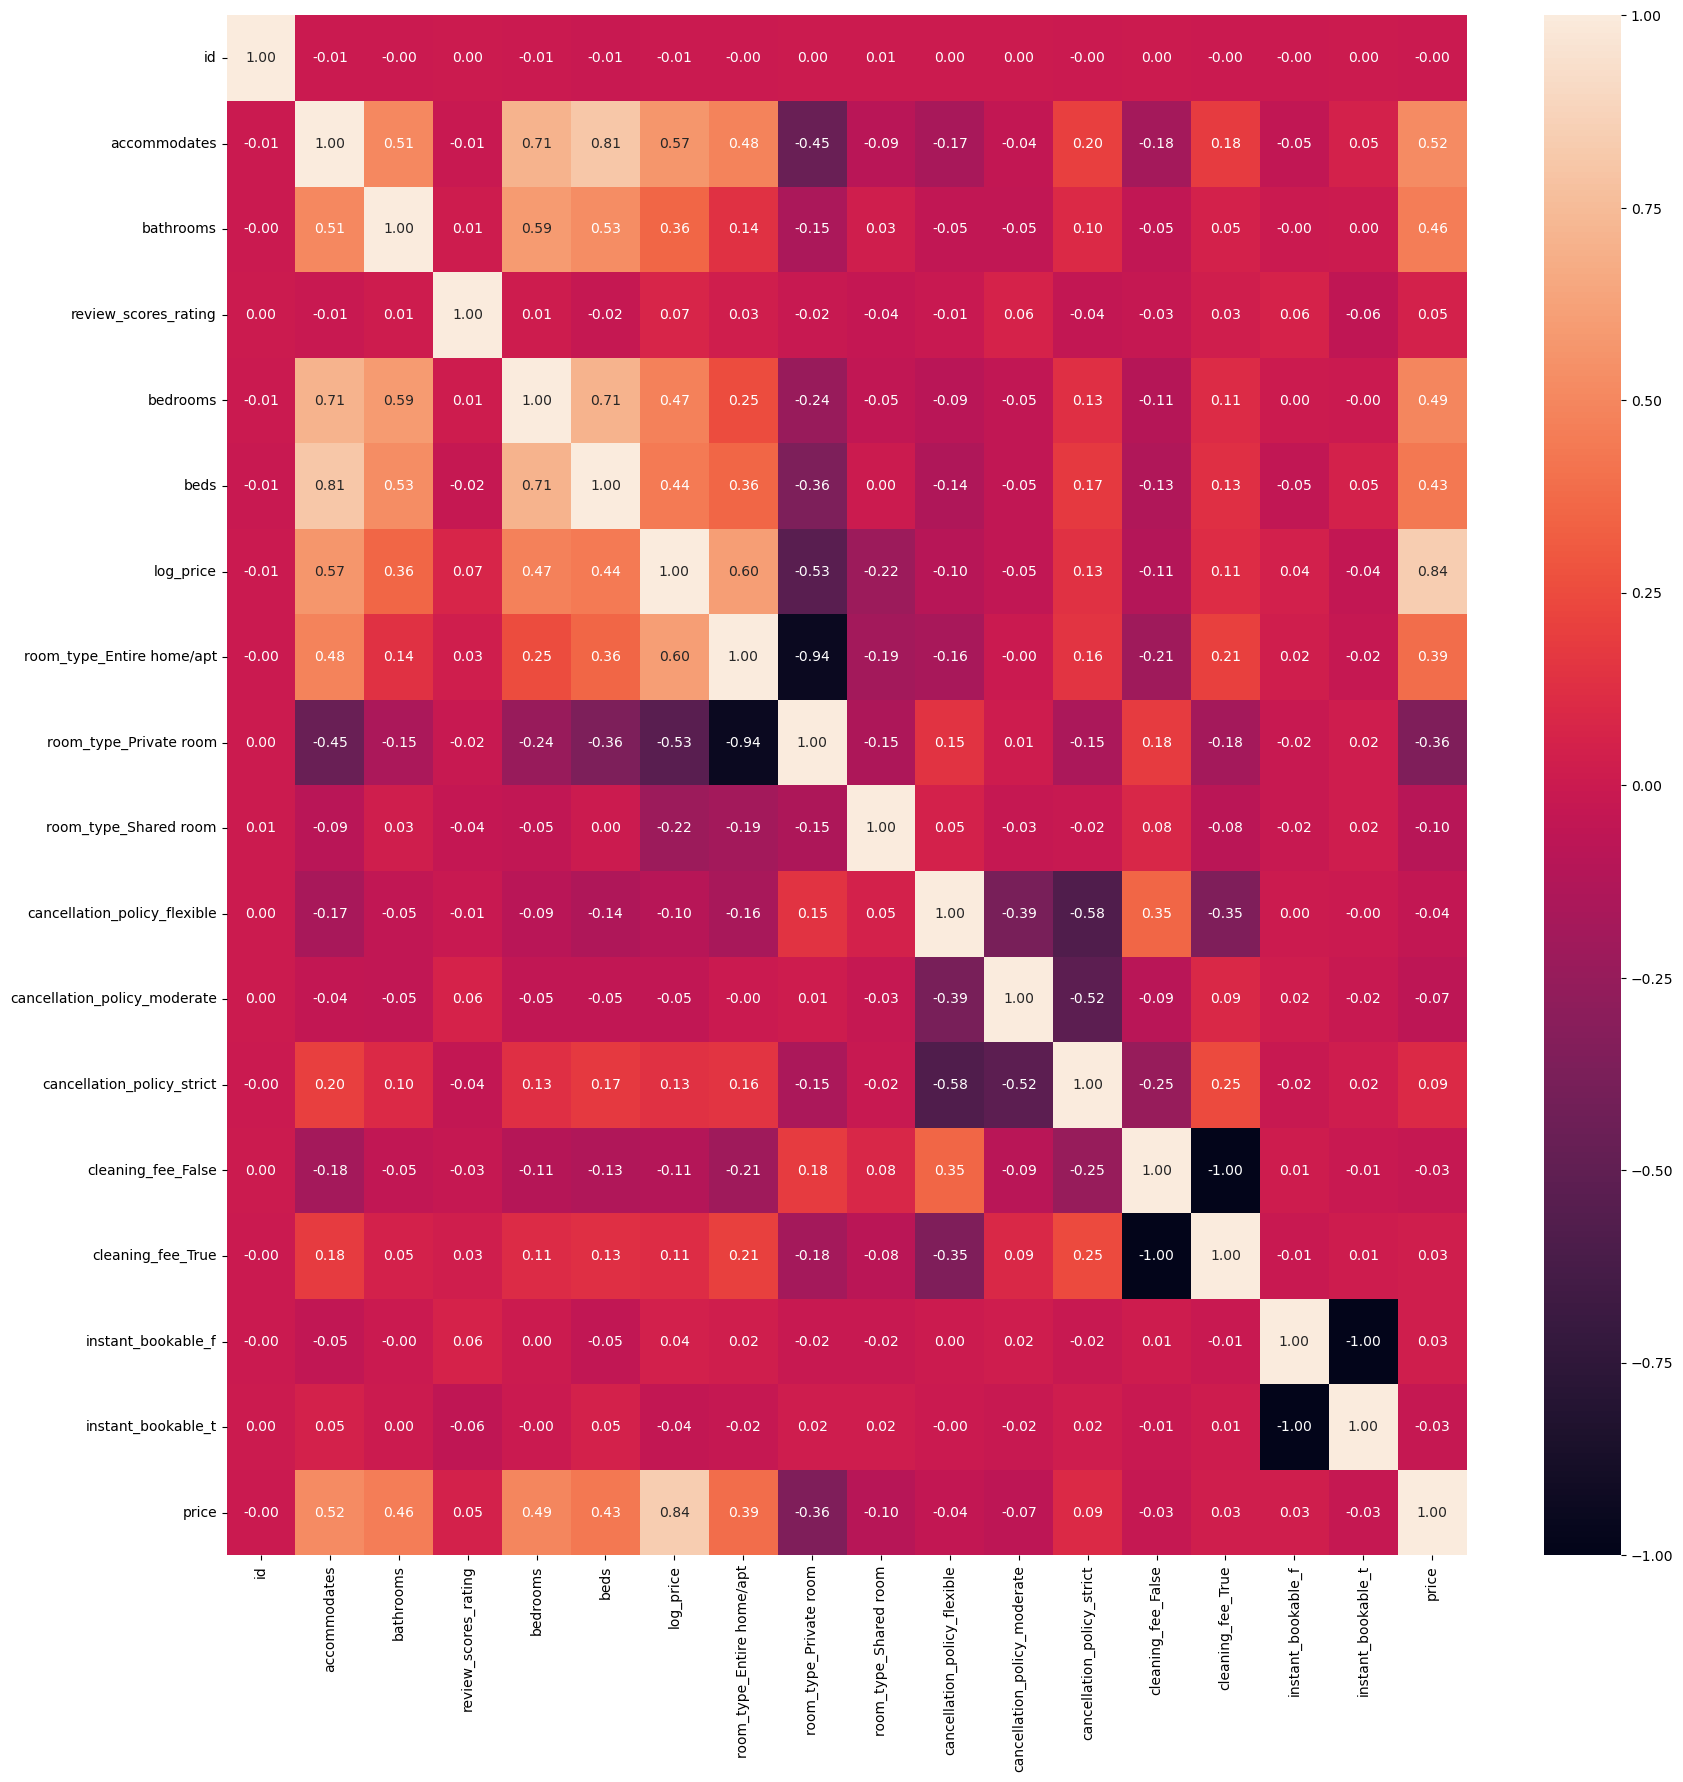

In [38]:
fig,ax=plt.subplots(figsize=(20,20)) # we can use also plt.figure(figsize=())
sns.heatmap(df1.corr(), annot=True,fmt='.2f',ax=ax)  # plot the correlation coefficients as a heatmap
plt.show()

In [52]:
df2=df1.copy()

In [53]:
df2.drop(['beds','room_type_Private room','cancellation_policy_flexible'],axis=1,inplace=True)

### <font color = 'green'> **Model buidling - Linear Regression Model**

<font size=3> Q. Buid a linear regression model and evaluate the model performance.

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
regression_model = LinearRegression()

regression_model.fit(X_train, y_train)

LinearRegression()

In [54]:
import statsmodels.api as smf

target=['price']
feature_column=df2.columns.difference(target)
X = df2[feature_column]
X = smf.add_constant(X)

# Fit the OLS model
y = df2[target]
model = smf.OLS(y, X).fit()

# Get the summary of the OLS regression
summary = model.summary()
print(summary)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                 1.795e+04
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:16:09   Log-Likelihood:            -4.3242e+05
No. Observations:               74111   AIC:                         8.649e+05
Df Residuals:                   74097   BIC:                         8.650e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

<font size=3> Please do play around with the data and check whether the accuracy can be increased or not. Also, do try to interpret the output and write your conclusions.

-----
### Happy Learning :)
-----